<a href="https://colab.research.google.com/github/kittimaxz/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [2]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [3]:
Name = 'กิตติมา อุปสุข'
ID = '6230210409'

In [4]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [5]:
Data = DataGenerator(Name,ID)

021:22:11


In [6]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.889351,-3.687852,5.854784,-3.415873,-5.610665,-2.582173,3.694650,-5.062654,-4.586200,6.457132,2.304650,4.329046,7.206710,-5.144610,-1.245484,-7.250447,9.249019,4.797001,5.020432,-3.889117,8.994408,-11.231579,-7.375703,-54.157893
1,6.888596,-6.324905,-5.740092,5.299575,-2.842515,2.372734,7.933971,-9.659946,6.361068,-10.214856,0.338380,-1.412124,3.624184,4.602672,-8.628475,-7.482172,-0.471848,5.111467,-7.731085,2.441740,-7.366802,-1.858061,-12.649810,-7.290306
2,8.017362,8.473604,3.038962,-6.893468,-7.191756,-2.181812,-8.602517,1.635662,-4.501795,-8.114539,-6.316734,-4.982942,1.302537,-2.022844,0.086704,-2.306383,-8.802485,-6.781084,-3.476832,-4.668904,-9.690799,5.240675,16.947207,28.203376
3,-5.259314,7.534503,7.437431,4.414411,-0.059253,-7.445860,-4.424710,-3.564299,-3.465228,-0.862653,2.011504,-4.724475,6.885026,4.804179,7.909228,-4.198045,4.079989,2.923757,-2.001206,-2.269056,6.894771,1.137825,15.069006,7.689124
4,11.803001,-5.373877,-6.309848,5.999780,-2.165905,3.767224,8.701775,-8.471486,5.789175,-9.041266,0.967662,-0.752092,4.443130,3.572116,-9.602990,-7.327553,2.603626,3.287083,-6.879058,1.562324,-6.132335,-0.672218,-10.747753,-1.361092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.386310,0.143661,7.034918,8.043940,6.736725,6.999241,4.103643,-2.564332,-3.517837,6.354337,-7.514451,-2.221127,-5.829928,2.024862,6.591702,-3.938688,6.786948,5.749472,2.184205,-5.268825,6.337545,-0.350062,0.287322,0.249688
9996,-5.933911,7.865360,7.554697,5.966666,-0.086257,-5.588988,-3.534003,-2.527750,-4.761734,-0.426129,1.003535,-6.136890,5.449768,3.955082,6.685563,-6.451825,3.396171,3.630983,-1.397212,-3.044932,5.194200,1.544812,15.730721,9.724062
9997,-9.191507,-5.048968,4.294216,-9.342154,-7.362920,-9.229852,-4.192468,3.754275,-2.734278,4.230375,-9.031066,7.426534,-6.797743,-5.650139,2.036746,8.826735,5.432167,9.468526,6.800718,-1.900056,-3.067357,3.287883,-10.097935,18.439417
9998,-2.169208,11.419935,-5.335483,3.089792,8.711882,6.311260,-4.494053,11.339766,-1.473491,10.446842,-9.495673,9.596118,5.562927,-7.996054,4.785754,-5.670202,1.141286,0.046121,-7.345678,5.898585,8.302183,2.210728,22.839871,13.053641


ลอง plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

In [7]:
import pandas as pd

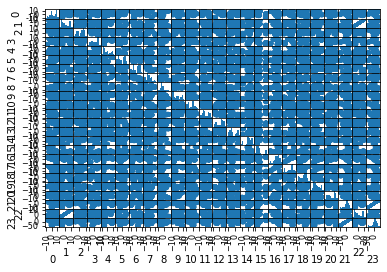

In [8]:
pd.plotting.scatter_matrix(Data);

In [9]:
Data.shape ###ดูขนาดของข้อมูล Data

(10000, 24)

เตรียมข้อมูลก่อนที่จะนำไปใช้ โดยการตัดตัวที่มี correlation กันออกไปก่อน เพื่อลดข้อมูลที่เหมือนกันออกจาก  Data

In [10]:
corr=np.corrcoef(Data.to_numpy().T)

In [11]:
corr.shape ###ดูขนาดของ corrcoef ของ Data

(24, 24)

ทำการวนลูปหาค่า correlation ที่ซ้ำกัน เพื่อนำค่าที่ซ้ำกันออก

In [12]:
for i in range(corr.shape[0]):
  for j in range(corr.shape[1]):
    if (i != j) and (corr[i,j] == 1.):
      print (f' row={i} column={j} corrcoef={corr[i,j]}')

 row=1 column=22 corrcoef=1.0
 row=21 column=23 corrcoef=1.0
 row=22 column=1 corrcoef=1.0
 row=23 column=21 corrcoef=1.0


จากการวนลูป จะเห็นได้ว่ามี correlation ที่ซ้ำกันอยู่ 2 ค่า ดังนั้นจึงต้องทำการนำข้อมูลที่ซ้ำกันออกก่อน จึงจะนำข้อมูลไปใช้ได้

In [13]:
Data.iloc[:5,1:21]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-3.687852,5.854784,-3.415873,-5.610665,-2.582173,3.694650,-5.062654,-4.586200,6.457132,2.304650,4.329046,7.206710,-5.144610,-1.245484,-7.250447,9.249019,4.797001,5.020432,-3.889117,8.994408
1,-6.324905,-5.740092,5.299575,-2.842515,2.372734,7.933971,-9.659946,6.361068,-10.214856,0.338380,-1.412124,3.624184,4.602672,-8.628475,-7.482172,-0.471848,5.111467,-7.731085,2.441740,-7.366802
2,8.473604,3.038962,-6.893468,-7.191756,-2.181812,-8.602517,1.635662,-4.501795,-8.114539,-6.316734,-4.982942,1.302537,-2.022844,0.086704,-2.306383,-8.802485,-6.781084,-3.476832,-4.668904,-9.690799
3,7.534503,7.437431,4.414411,-0.059253,-7.445860,-4.424710,-3.564299,-3.465228,-0.862653,2.011504,-4.724475,6.885026,4.804179,7.909228,-4.198045,4.079989,2.923757,-2.001206,-2.269056,6.894771
4,-5.373877,-6.309848,5.999780,-2.165905,3.767224,8.701775,-8.471486,5.789175,-9.041266,0.967662,-0.752092,4.443130,3.572116,-9.602990,-7.327553,2.603626,3.287083,-6.879058,1.562324,-6.132335


ลบ column ที่ซ้ำกันออก

In [14]:
from matplotlib import pyplot as plt

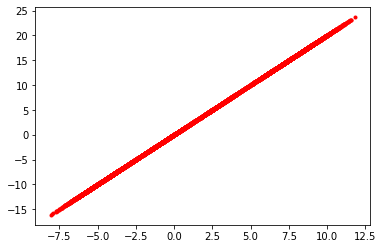

In [15]:
plt.plot(Data.iloc[:,1],Data.iloc[:,22],'r.')

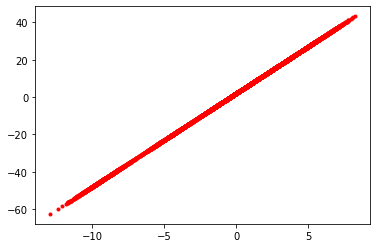

In [16]:
plt.plot(Data.iloc[:,21],Data.iloc[:,23],'r.')

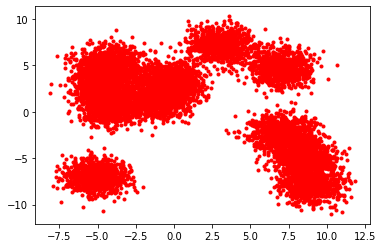

In [17]:
plt.plot(Data.iloc[:,1],Data.iloc[:,18],'r.')

**ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

**Clustering**

**K-mean**

***import***

In [18]:
from sklearn.cluster import KMeans

***define***

In [19]:
kmeans=KMeans(n_clusters=3,random_state=2021)

***fit-transform***

คำนวณหาจุด cluster center ของข้อมูล data ด้วยวิธี K-Means Clustering

In [20]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [21]:
kmeans.cluster_centers_

array([[  4.92887089,   1.09010258,   5.08006368,  -1.55116268,
          1.29812358,   1.09438582,  -2.89774424,  -0.43101719,
         -1.65886567,   3.76762652,  -0.62245426,   0.95405381,
          1.45852145,   0.51397039,   2.78079752,  -6.83176488,
          7.13784822,   5.98129275,   3.85679315,  -5.68437279,
          3.11257487,  -6.67126579,   2.18020515, -31.35632896],
       [  1.77826918,  -1.93689923,   1.18278694,   0.75459641,
         -3.51378993,  -1.15094849,   4.53556567,  -3.65577794,
         -2.91347647,  -4.21253118,  -1.23707381,   0.5204196 ,
          0.51974662,  -3.20495773,  -0.48520761,  -1.93568619,
          4.44815547,   1.92379895,   1.73610812,  -1.28144432,
         -0.15122804,   1.11902076,  -3.87379847,   7.5951038 ],
       [  0.62510569,   8.14442613,   2.31822096,   1.19925245,
          0.8895622 ,  -1.77311166,  -5.1950023 ,   1.77496889,
         -3.46651138,   0.1359663 ,  -4.2693267 ,  -0.1792533 ,
          4.81999339,  -2.75716895,   

ทำสอบการจัดกลุ่มของ Data

In [22]:
y=kmeans.predict(Data)
y

array([0, 1, 2, ..., 1, 2, 2], dtype=int32)

ทำ PCA ข้อมูล Data 

In [37]:
from sklearn.decomposition import PCA

In [39]:
pca=PCA(n_components=2)

In [40]:
new_pca=pca.fit_transform(Data)

In [41]:
from matplotlib import pyplot as plt

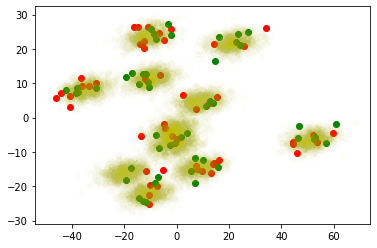

In [25]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',alpha=1)
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',alpha=1)
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',alpha=0.02)

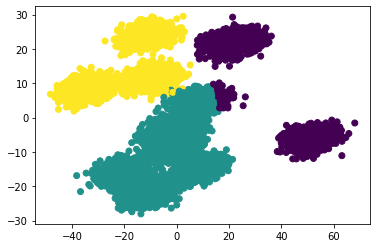

In [45]:
kmeans=KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y=kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

**Elbow Method**

**SSE**

In [49]:
kmeans.inertia_ ###SSE คือ Sum of Squared Error

7022214.192783495

In [50]:
SSE=list()
for k in [1,2,3,4,5,6,7,8]:
  kmeans=KMeans(n_clusters=k,random_state=2021)
  kmeans.fit(Data)
  SSE.append(kmeans.inertia_)

In [51]:
SSE

[11957322.79958456,
 8702496.394593643,
 7022214.192783495,
 5664542.793044245,
 4323475.685648333,
 3392931.4484599875,
 2684949.6732077827,
 2063455.4084842256]

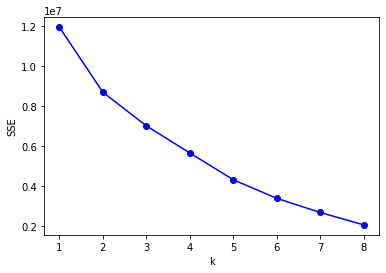

In [52]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

**Silhouette coeffient**

In [53]:
from sklearn import metrics

In [54]:
SilH=list()
for k in [2,3,4,5,6,7,8]:
  kmeans=KMeans(n_clusters=k,random_state=2021)
  kmeans.fit(Data)
  score=metrics.silhouette_score(Data,kmeans.labels_)
  SilH.append(score)

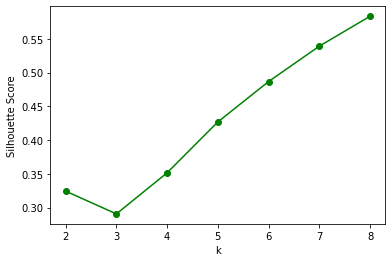

In [55]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');